# Проект "Анализ данных федерального медицинского центра ФГБОУ ВО СПбГПМУ"

Цель: узнать, какие факторы влияют на время, которое занимает процесс от выдачи направления до поступления в медицинский центр.

Задачи: 
Проанализировать распределние пациентов по количеству дней госпитализации; проанализировать отделения по длительности госпитализации пациентов и выявить лидеров; проанализировать количество поступивших пациентов по годам; проверить гипотезу, что  средняя длительность госпитализации пациентов отличается от стандартного семидневного срока и гипотезу, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/hospital.csv')

In [32]:
#Изучим датафрейм:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ДАТА_ПОСТУПЛЕНИЯ         125261 non-null  object 
 1   ДАТА_ВЫПИСКИ             125261 non-null  object 
 2   УНИКАЛЬНЫЙ_ID            125261 non-null  int64  
 3   НОМЕР_ИБ                 125261 non-null  int64  
 4   ШИФР                     125261 non-null  object 
 5   РЕГИОН                   56391 non-null   object 
 6   ПЛАТЕЛЬЩИК               125261 non-null  object 
 7   ИСТОЧНИК_ФИНАНСИРОВАНИЯ  125261 non-null  object 
 8   ОТДЕЛЕНИЕ                125261 non-null  object 
 9   ПРОФИЛЬ                  125261 non-null  object 
 10  КОЙКО_ДНИ                125261 non-null  float64
 11  ПЛАНОВО_ЭКСТРЕННО        125261 non-null  object 
 12  КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ  125253 non-null  object 
 13  КОД_МКБ_ПРИ_ВЫПИСКЕ      125257 non-null  object 
dtypes: f

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


Столбцы с датой поступления и датой выписки нужно поменять на тип "дата".

In [33]:
df['ДАТА_ПОСТУПЛЕНИЯ'] = pd.to_datetime(df['ДАТА_ПОСТУПЛЕНИЯ'])

In [34]:
df['ДАТА_ВЫПИСКИ'] = pd.to_datetime(df['ДАТА_ВЫПИСКИ'])

In [35]:
#Изучим пропуски:

df.isnull().sum()

ДАТА_ПОСТУПЛЕНИЯ               0
ДАТА_ВЫПИСКИ                   0
УНИКАЛЬНЫЙ_ID                  0
НОМЕР_ИБ                       0
ШИФР                           0
РЕГИОН                     68870
ПЛАТЕЛЬЩИК                     0
ИСТОЧНИК_ФИНАНСИРОВАНИЯ        0
ОТДЕЛЕНИЕ                      0
ПРОФИЛЬ                        0
КОЙКО_ДНИ                      0
ПЛАНОВО_ЭКСТРЕННО              0
КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ        8
КОД_МКБ_ПРИ_ВЫПИСКЕ            4
dtype: int64

Пропуски встечаются в основном в строке "Регион". Скорее всего эта информация отсутсвует в базе данных. Не будем ничего исправлять в этих пропусках. Также незначительное количество пропусков есть в строках "КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ" и "КОД_МКБ_ПРИ_ВЫПИСКЕ". Но эти данные в исследовании нам не пригодятся. Так что тоже их менять не будем.

In [36]:
#Посмотрим наличие дубликаов в строке "УНИКАЛЬНЫЙ_ID". Для этого проверим количесто уникальных значений по этому параметру:
df['УНИКАЛЬНЫЙ_ID'].nunique()

77019

Количество уникальных значений в строке "УНИКАЛЬНЫЙ_ID" гораздо меньше чем количество строк. Избавимся от дубликатов в строке "УНИКАЛЬНЫЙ_ID".

In [37]:
df.drop_duplicates(subset=['УНИКАЛЬНЫЙ_ID'])

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,2019-01-01,2019-10-01,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,2019-01-01,2019-01-01,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,2019-01-01,2019-01-01,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,2019-01-01,2019-07-01,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,2019-01-01,2019-05-01,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125255,2023-12-30,2024-02-01,1258804000,10385561,9.2.0,NaN,Новорожденные в ПЦ,не определен,ПЦ Отделение физиологии новорожденных,Для новорожденных,4.0,Плановая,Z38.0,Z38.0
125257,2023-12-30,2024-06-01,1258807000,38558,5.12.1,Ульяновская обл.,"ООО ""Капитал Медицинское Страхование""",ОМС,Инфекционное отделение №1,Инфекционные,8.0,Экстренная,J01.9,J06.8
125258,2023-12-30,2024-01-26,1258810000,38560,5.666.1,NaN,ОМС 86 Регион,ОМС,Гастроэнтерологическое отделение,Гастроэнтерологические,28.0,Плановая,K75.4,K73.2
125259,2023-12-30,2023-12-30,1258811000,38561,5.666.0,NaN,ОМС 86 Регион,ОМС,ПЭМП ДПО,Хирургические для детей,1.0,Экстренная,K59.0,K59.0


In [38]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество пациентов')

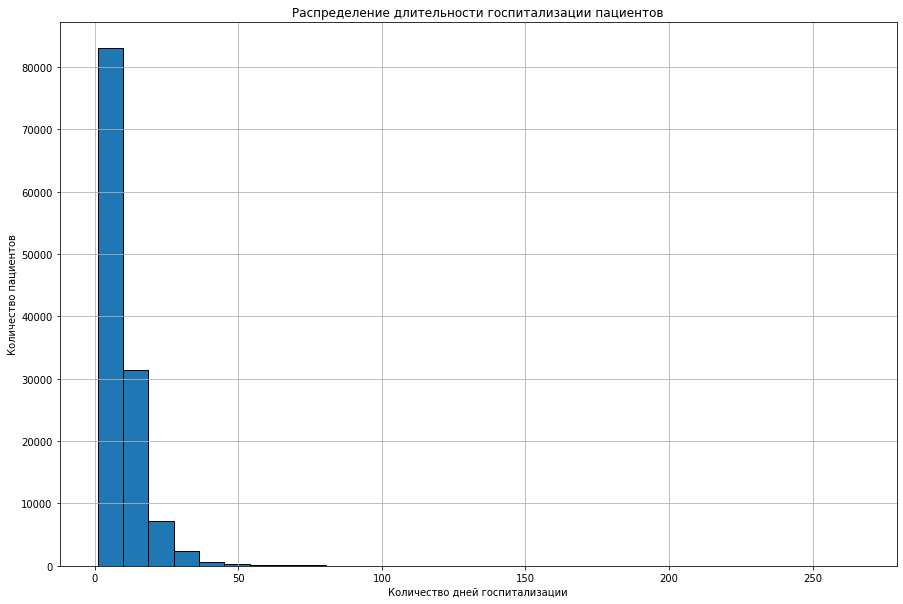

In [39]:
#Построим гистограмму распределения длительности госпитализации пациентов:

df['КОЙКО_ДНИ'].hist(figsize=(15,10), bins=30, edgecolor='black')
plt.title('Распределение длительности госпитализации пациентов')
plt.xlabel('Количество дней госпитализации')
plt.ylabel('Количество пациентов')

По количеству дней госпитализации основная масса пациентов задерживается в больнице до 20 дней. А большая часть - до 10.

In [40]:
#Построим диаграмму для топ 10 отделений по наибольшей длительности госпитализации пациентов. Для этого сначала найдем топ 10 отделений:

df_days_by_sub = df.groupby('ОТДЕЛЕНИЕ')['КОЙКО_ДНИ'].mean().sort_values(ascending = False).head(10)

Text(0, 0.5, 'Отделение')

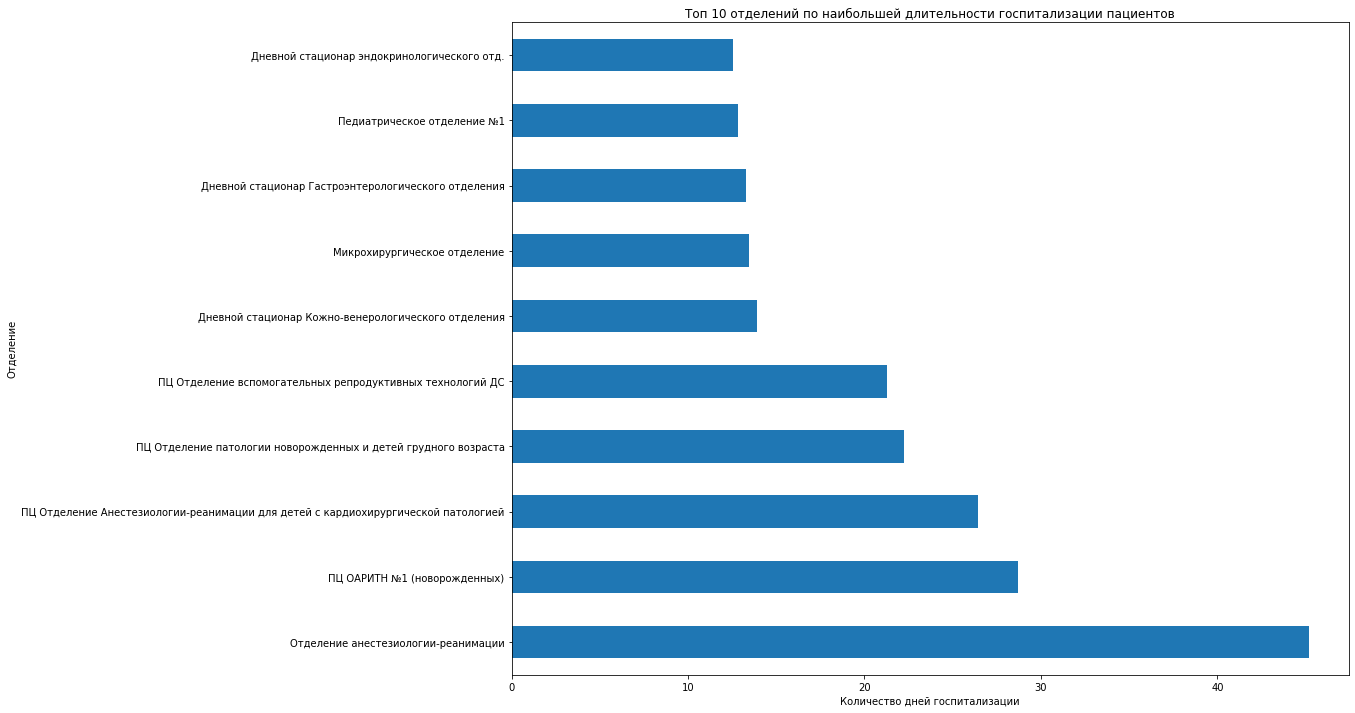

In [41]:
df_days_by_sub.plot(kind='barh', x='ОТДЕЛЕНИЕ', y='КОЙКО_ДНИ', figsize=(15,12))
plt.title('Топ 10 отделений по наибольшей длительности госпитализации пациентов')
plt.xlabel('Количество дней госпитализации')
plt.ylabel('Отделение')

По длительности госпитализации пациентов с большим отрывом лидирует отделение анестезиологии-реанимации.Второе место занимает ПЦ ОАРИТН №1, а на третьем - ПЦ отделение Анестезиологии Реанимации для детей с кардиохирургической патологией.

In [42]:
#Построим график динамику количества поступивших пациентов в разные месяцы. Для этого выудим месяцы из даты поступления:

df['МЕСЯЦ_ПОСТУПЛЕНИЯ'] = df['ДАТА_ПОСТУПЛЕНИЯ'].dt.to_period('M')

In [43]:
#Сгруппируем всех поступивших по месяцу поступления:

hospitalisation_per_month = df.groupby('МЕСЯЦ_ПОСТУПЛЕНИЯ')['УНИКАЛЬНЫЙ_ID'].nunique()

Text(0, 0.5, 'Количество поступивших пациентов')

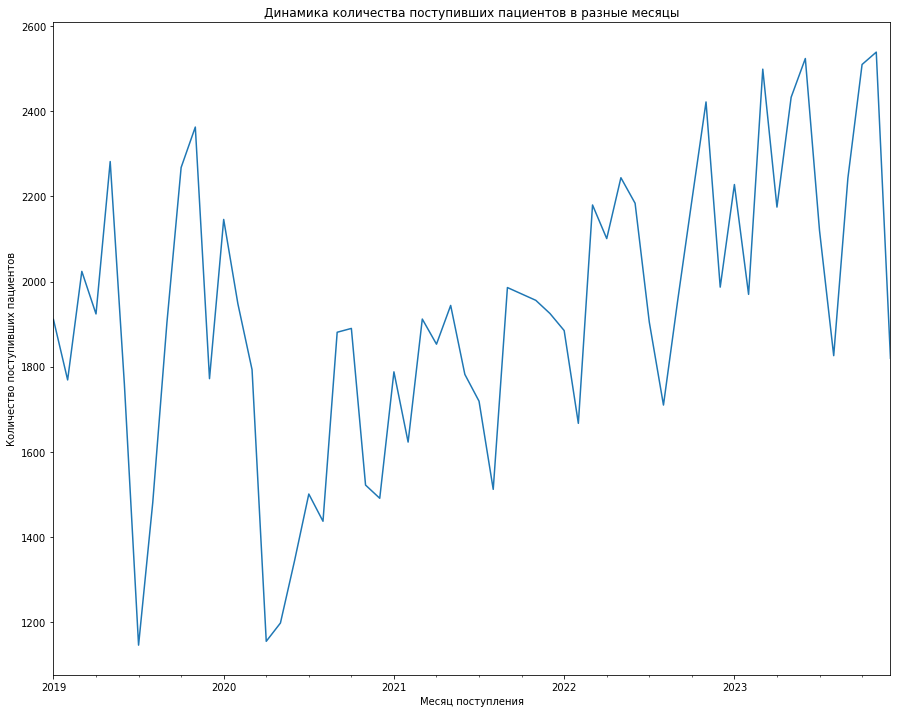

In [44]:
hospitalisation_per_month.plot(kind='line', figsize=(15,12))
plt.title('Динамика количества поступивших пациентов в разные месяцы')
plt.xlabel('Месяц поступления')
plt.ylabel('Количество поступивших пациентов')

Больше всего поступивших в конце 2019, в начале и в конце 2023. Меньше всего - в середине 2019 и в начале 2020. График скачащий, без явных тенденций на увеличение или снижение. С середины 2020 идет плавное увеличение поступивших пациентов, но график при этом все равно остается скачащим.

In [45]:
#Проверим гипотезу, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. 
from scipy import stats as st
import numpy as np

In [46]:
avg_hospitalization = df['КОЙКО_ДНИ']

In [47]:
std_hospitalization = 7

In [48]:
alpha = 0.05

In [49]:
results = st.ttest_1samp(avg_hospitalization, std_hospitalization)

In [50]:
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем Н0')
else:
    print('Не получилось отвергнуть Н0')

p-value: 0.0
Отвергаем Н0


Нулевая гипотеза отвергнута. Значит, что с большой долей вероятности средняя длительность госпитализации пациентов отличается от стандартного семидневного срока. 

In [51]:
#Проверим гипотезу, превышает ли средняя длительность госпитализации пациентов 10 дней.

ten_dayys_hospitalization = 10

In [52]:
results_ten = st.ttest_1samp(avg_hospitalization, ten_dayys_hospitalization, alternative='greater')

In [53]:
print('p-value:', results_ten.pvalue)
if results_ten.pvalue < alpha:
    print('Отвергаем Н0')
else:
    print('Не получилось отвергнуть Н0')

p-value: 1.0
Не получилось отвергнуть Н0


Не получилось отвергнуть нулевую гипотезу. Значит, что с большой долей вероятности средняя длительность госпитализации пациентов превышает 10 дней.

In [54]:
#Проверим гипотезу, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

df['ПЛАНОВО_ЭКСТРЕННО'].unique()

array(['Экстренная', 'Плановая'], dtype=object)

In [55]:
avg_hospitalization_plan = df['КОЙКО_ДНИ'][df['ПЛАНОВО_ЭКСТРЕННО'] == 'Плановая']

In [56]:
avg_hospitalization_extra = df['КОЙКО_ДНИ'][df['ПЛАНОВО_ЭКСТРЕННО'] == 'Экстренная']

In [57]:
results_plan_ex = st.ttest_ind(avg_hospitalization_plan, avg_hospitalization_extra)

In [58]:
print('p-value:', results_plan_ex.pvalue)
if results_plan_ex.pvalue < alpha:
    print ('Отвергаем Н0')
else:   
    print('Не удалось отвергнуть Н0')

p-value: 0.0
Отвергаем Н0


Нулевая гипотеза отвергнута. Значит, что с большой долей вероятности средняя длительность лечения в стационаре между плановыми и экстренными пациентами отличается.

# Выводы.

В проекте были проанализированы данные федерального медицинского центра ФГБОУ ВО СПбГПМУ. В ходе анализа можно сделать следующие выводы:

1) По количеству дней госпитализации основная масса пациентов задерживается в больнице до 20 дней. А большая часть - до 10.

2) По длительности госпитализации пациентов с большим отрывом лидирует отделение анестезиологии-реанимации. Второе место занимает ПЦ ОАРИТН №1, а на третьем - ПЦ отделение Анестезиологии Реанимации для детей с кардиохирургической патологией.

3) Больше всего поступивших в конце 2019, в начале и в конце 2023. Меньше всего - в середине 2019 и в начале 2020. График скачащий, без явных тенденций на увеличение или снижение. С середины 2020 идет плавное увеличение поступивших пациентов, но график при этом все равно остается скачащим.

4) Средняя длительность госпитализации пациентов отличается от стандартного семидневного срока и превышает 10 дней.

5) С большой долей вероятности средняя длительность лечения в стационаре между плановыми и экстренными пациентами отличается.

Получается, что стационары особо не перегружены, а длительность лечения у плановых и экстренных пациентов различны. Данные постоянно меняются по месяцам в течение 4-х лет. Наблюдается небольшая тенденция на общее увеличение пациентов.